# GARCH Stock Forecasting

## Read Data

In [30]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from arch.__future__ import reindexing

## DIS Volatility

In [31]:
start = datetime(2015, 1, 1)
end = datetime(2021, 4, 16)

In [32]:
dis = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [33]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

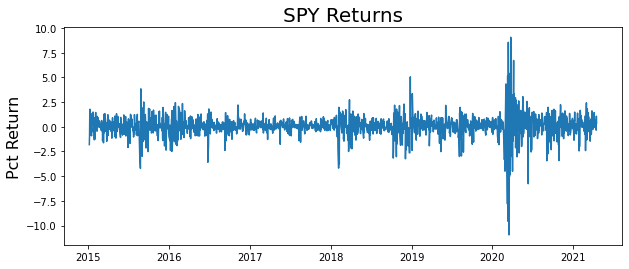

In [34]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

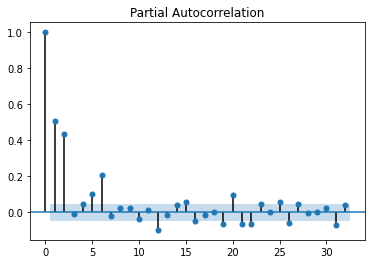

In [35]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [36]:
model = arch_model(returns, p=3, q=3)

In [37]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9217.510616939417
Iteration:      2,   Func. Count:     23,   Neg. LLF: 110866.8099947988
Iteration:      3,   Func. Count:     33,   Neg. LLF: 3086.9016447452477
Iteration:      4,   Func. Count:     43,   Neg. LLF: 3689.406818081313
Iteration:      5,   Func. Count:     54,   Neg. LLF: 2759.920721875508
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2370.863524939219
Iteration:      7,   Func. Count:     75,   Neg. LLF: 2007.622198032856
Iteration:      8,   Func. Count:     85,   Neg. LLF: 1955.2784194525307
Iteration:      9,   Func. Count:     95,   Neg. LLF: 1938.8800777714434
Iteration:     10,   Func. Count:    104,   Neg. LLF: 1938.29770589364
Iteration:     11,   Func. Count:    113,   Neg. LLF: 1938.2470453786675
Iteration:     12,   Func. Count:    122,   Neg. LLF: 1938.1979174690155
Iteration:     13,   Func. Count:    131,   Neg. LLF: 1938.1936865997293
Iteration:     14,   Func. Count:    140,   Neg. LLF: 1938.

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1938.19
Distribution:                  Normal   AIC:                           3892.38
Method:            Maximum Likelihood   BIC:                           3935.31
                                        No. Observations:                 1582
Date:                Sun, Apr 18 2021   Df Residuals:                     1581
Time:                        20:00:32   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0906  1.743e-02      5.200  1.994e-07 [5.647e-02,  0.125]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0888  7.327e-02      1.212      0.226 [-5.480e-02,  0.232]
alpha[1]       0.2587  4.620e-02      5.600  2.140e-08    [  0.168,  0.349]
alpha[2]       0.1372      0.157      0.876      0.381    [ -0.170,  0.444]
alpha[3]       0.1334      0.334      0.399      0.690    [ -0.521,  0.788]
beta[1]    5.3385e-15      0.648  8.237e-15      1.000    [ -1.270,  1.270]
beta[2]    1.1005e-14      0.961  1.145e-14      1.000    [ -1.884,  1.884]
beta[3]        0.4158      0.876      0.475      0.635    [ -1.300,  2.132]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [39]:
model = arch_model(returns, p=3, q=0)

In [40]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10184.159594145949
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12592872.398128096
Iteration:      3,   Func. Count:     24,   Neg. LLF: 222033.73379174498
Iteration:      4,   Func. Count:     31,   Neg. LLF: 9219.610419010289
Iteration:      5,   Func. Count:     38,   Neg. LLF: 5115.063424066115
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3308.1737519439616
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2055.091112908985
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3254.0812994217495
Iteration:      9,   Func. Count:     66,   Neg. LLF: 1999.4129013983372
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1993.63490267739
Iteration:     11,   Func. Count:     78,   Neg. LLF: 1992.357199746167
Iteration:     12,   Func. Count:     84,   Neg. LLF: 1991.9551596813344
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1991.8676474353088
Iteration:     14,   Func. Count:     96,   Neg. LLF: 199

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1991.82
Distribution:                  Normal   AIC:                           3993.64
Method:            Maximum Likelihood   BIC:                           4020.47
                                        No. Observations:                 1582
Date:                Sun, Apr 18 2021   Df Residuals:                     1581
Time:                        20:00:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0926  1.809e-02      5.120  3.059e-07 [5.715e-02,  0.128]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2662  3.562e-02      7.474  7.801e-14 [  0.196,  0.336]
alpha[1]       0.2846  6.289e-02      4.525  6.049e-06 [  0.161,  0.408]
alpha[2]       0.2597  4.978e-02      5.218  1.810e-07 [  0.162,  0.357]
alpha[3]       0.2896  7.053e-02      4.106  4.034e-05 [  0.151,  0.428]
========================================================================

Covariance estimator: robust
"""

In [42]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [43]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

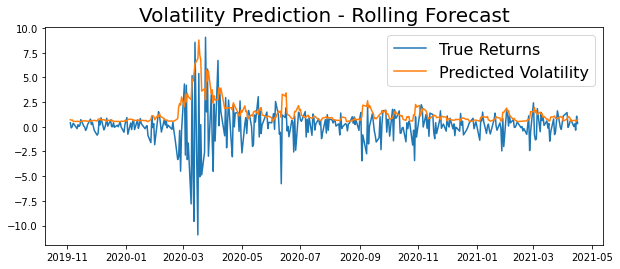

In [44]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [45]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [46]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [47]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

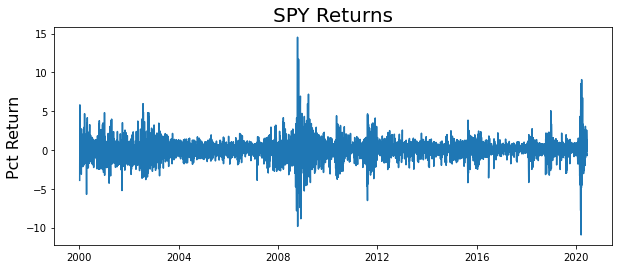

In [48]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

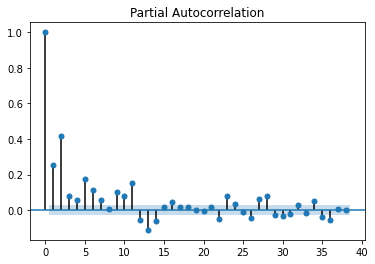

In [49]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [50]:
model = arch_model(returns, p=2, q=2)

In [51]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95620.69814392301
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56371.79369385309
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11215.319056478227
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13888.433440493976
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2441495167.0784636
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7231.193375299004
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7089.76457614309
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7056.837976070965
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7055.800209941397
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7053.566838674585
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7053.566735133912
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7053.566735131457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7053.566735133912
            Iterations: 12

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7053.57
Distribution:                  Normal   AIC:                           14119.1
Method:            Maximum Likelihood   BIC:                           14158.4
                                        No. Observations:                 5141
Date:                Sun, Apr 18 2021   Df Residuals:                     5140
Time:                        20:00:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.054  1.411e-09 [4.486e-02,8.782e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0407  9.930e-03      4.094  4.245e-05 [2.119e-02,6.011e-02]
alpha[1]       0.0809  2.203e-02      3.673  2.395e-04   [3.775e-02,  0.124]
alpha[2]       0.1331  3.037e-02      4.382  1.175e-05   [7.356e-02,  0.193]
beta[1]        0.2976      0.293      1.014      0.310     [ -0.277,  0.873]
beta[2]        0.4592      0.258      1.777  7.563e-02  [-4.739e-02,  0.966]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [53]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [54]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

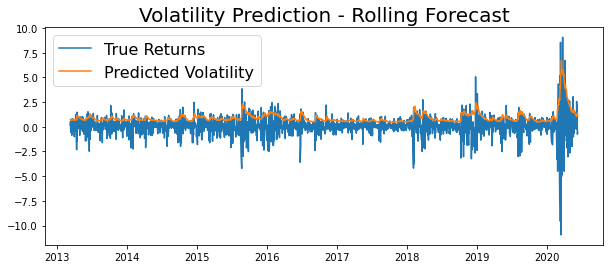

In [55]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [56]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [57]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

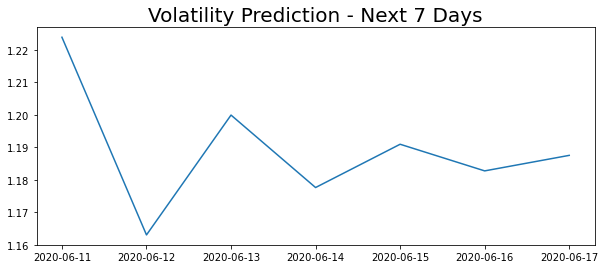

In [58]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)